# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# base = > http://api.openweathermap.org
# path => /data/2.5/weather
# Params => units=Imperial&APPID={weather_api_key}&q=Londan

# endpoint => http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------


In [4]:
#Example to test call
city_url = url + "&q=" + 'london'
city_weather = requests.get(city_url).json()

In [5]:
city_weather
#Lists out all keys
print(city_weather.keys())
#check variables in keys
city_weather['weather']

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])


[{'id': 804,
  'main': 'Clouds',
  'description': 'overcast clouds',
  'icon': '04n'}]

In [6]:
#Curly base means dictionary
#type(city_weather) --> returns dict

In [7]:
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data (to test first, (cities[:5])
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#dict_keys(['coord', 'weather', 'base', 'main', 
           #'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | cockburn town
Processing Record 3 of Set 1 | moshkovo
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | key west
Processing Record 6 of Set 1 | shingu
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | fort nelson
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | goundam
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | biak
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | rodrigues alves
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | tuatapere
Processing Record 22 of Set 1 | vestmannaeyjar
Processing Record 23 of Set 1 | avarua
Processing Record 24 of Set 1 | iralaya
Processing Record 

Processing Record 36 of Set 4 | ancud
Processing Record 37 of Set 4 | lavrentiya
Processing Record 38 of Set 4 | virginia beach
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | dourbali
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | sabang
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | bonanza
Processing Record 49 of Set 4 | bogande
Processing Record 0 of Set 5 | hobyo
Processing Record 1 of Set 5 | filadelfia
Processing Record 2 of Set 5 | kangaba
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | hermanus
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | tiarei
Processing Record 7 of Set 5 | port lincoln
Processing Record 8 of Set 5 | mar de

Processing Record 26 of Set 8 | coffs harbour
Processing Record 27 of Set 8 | chissamba
Processing Record 28 of Set 8 | ginir
Processing Record 29 of Set 8 | tatui
Processing Record 30 of Set 8 | boende
Processing Record 31 of Set 8 | sumbe
Processing Record 32 of Set 8 | bijar
Processing Record 33 of Set 8 | santo tomas
Processing Record 34 of Set 8 | la gaulette
City not found. Skipping...
Processing Record 35 of Set 8 | kilindoni
Processing Record 36 of Set 8 | la palma
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | san jose
Processing Record 39 of Set 8 | zile
Processing Record 40 of Set 8 | autun
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | svetlogorsk
Processing Record 43 of Set 8 | half moon bay
Processing Record 44 of Set 8 | ossora
Processing Record 45 of Set 8 | tilichiki
Processing Record 46 of Set 8 | chekhov
Processing Record 47 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 8 | kununurr

Processing Record 12 of Set 12 | changping
Processing Record 13 of Set 12 | nueva gerona
Processing Record 14 of Set 12 | ozinki
Processing Record 15 of Set 12 | port dickson
Processing Record 16 of Set 12 | swift current
Processing Record 17 of Set 12 | plettenberg bay
Processing Record 18 of Set 12 | tonantins
Processing Record 19 of Set 12 | kita
Processing Record 20 of Set 12 | deputatskiy
Processing Record 21 of Set 12 | shangqiu
Processing Record 22 of Set 12 | naze
Processing Record 23 of Set 12 | assiniboia
Processing Record 24 of Set 12 | wajid
Processing Record 25 of Set 12 | mahajanga
Processing Record 26 of Set 12 | sao felix do xingu
Processing Record 27 of Set 12 | borogontsy
Processing Record 28 of Set 12 | wichita falls
Processing Record 29 of Set 12 | gilbues
Processing Record 30 of Set 12 | tarauaca
Processing Record 31 of Set 12 | bereda
Processing Record 32 of Set 12 | araouane
Processing Record 33 of Set 12 | barao de cocais
Processing Record 34 of Set 12 | bilibin

In [8]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,47.17,70,97,5.66,AR,1674767759
1,cockburn town,21.4612,-71.1419,77.68,79,7,16.60,TC,1674768016
2,moshkovo,55.3053,83.6104,13.48,83,97,22.86,RU,1674768016
3,kapaa,22.0752,-159.3190,73.72,61,40,17.27,US,1674767978
4,key west,24.5557,-81.7826,73.99,76,40,21.85,US,1674767900


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

print("Successful export")

Successful export


In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,47.17,70,97,5.66,AR,1674767759
1,cockburn town,21.4612,-71.1419,77.68,79,7,16.60,TC,1674768016
2,moshkovo,55.3053,83.6104,13.48,83,97,22.86,RU,1674768016
3,kapaa,22.0752,-159.3190,73.72,61,40,17.27,US,1674767978
4,key west,24.5557,-81.7826,73.99,76,40,21.85,US,1674767900


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

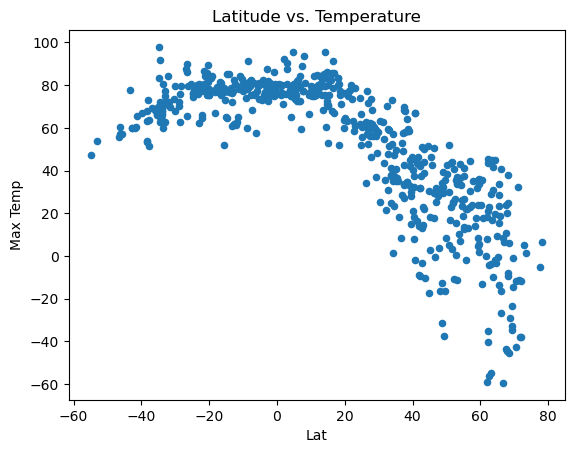

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter (x= "Lat", y= "Max Temp", title = 'Latitude vs. Temperature')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

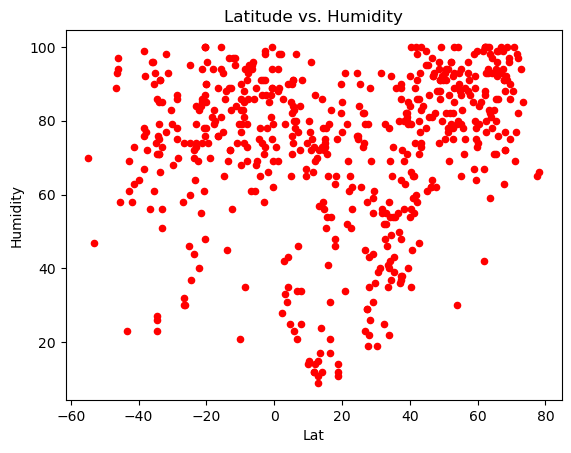

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter (x= "Lat", y= "Humidity", title = 'Latitude vs. Humidity', c = 'r')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

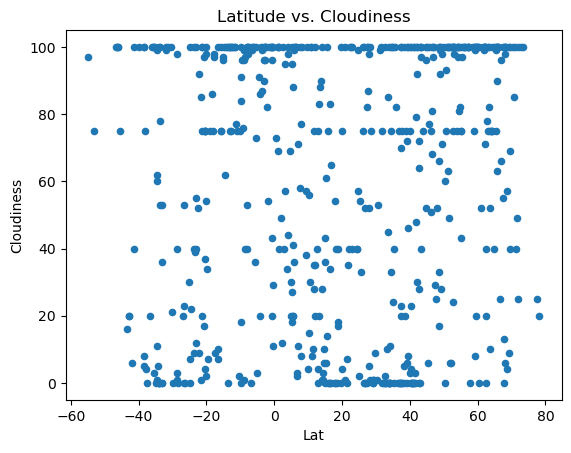

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter (x= "Lat", y= "Cloudiness", title = 'Latitude vs. Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

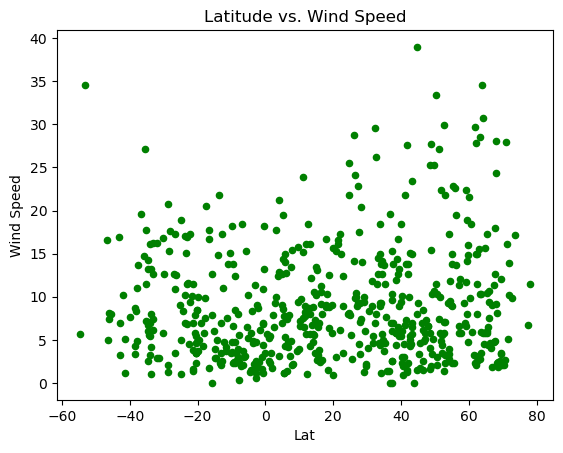

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter (x= "Lat", y= "Wind Speed", title = 'Latitude vs. Wind Speed', c = 'g')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
#Dependencies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [54]:
# Define a function to create Linear Regression plots

def linear_regression_plot(data, x_col, y_col):
    # Create a linear regression model
    model = LinearRegression()
    model.fit(data[[x_col]], data[y_col])
    
    # Make predictions using the model
    predictions = model.predict(data[[x_col]])
    
    # Create a scatter plot of the original data
    plt.scatter(data[x_col], data[y_col])
    
     # Calculate R-squared
    r_squared = r2_score(data[y_col], predictions)
    
    # Add the regression line to the plot
    plt.plot(data[x_col], predictions, color='r')
    
    # Add axis labels and a title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col}')
    
    # Add R-squared text to the plot
    plt.text(min(data[x_col]), max(data[y_col]), 'R-squared = {}'.format(round(r_squared, 3)), fontsize=12)
    plt.show()

In [27]:
city_data_df['Lat'] = city_data_df['Lat'].astype(int)


In [29]:
#Need Lat to be int to sort into hemispheres
print((city_data_df['Lat']).dtype)

int32


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cockburn town,21,-71.1419,77.68,79,7,16.60,TC,1674768016
2,moshkovo,55,83.6104,13.48,83,97,22.86,RU,1674768016
3,kapaa,22,-159.3190,73.72,61,40,17.27,US,1674767978
4,key west,24,-81.7826,73.99,76,40,21.85,US,1674767900
5,shingu,33,135.9833,38.03,78,100,4.43,JP,1674767774


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54,-68.3000,47.17,70,97,5.66,AR,1674767759
6,punta arenas,-53,-70.9167,53.71,47,75,34.52,CL,1674768017
14,cape town,-33,18.4232,67.91,71,0,16.11,ZA,1674768001
17,rodrigues alves,-7,-72.6509,82.60,86,98,2.46,BR,1674768021
18,atuona,-9,-139.0333,78.48,77,18,18.25,PF,1674768021


###  Temperature vs. Latitude Linear Regression Plot

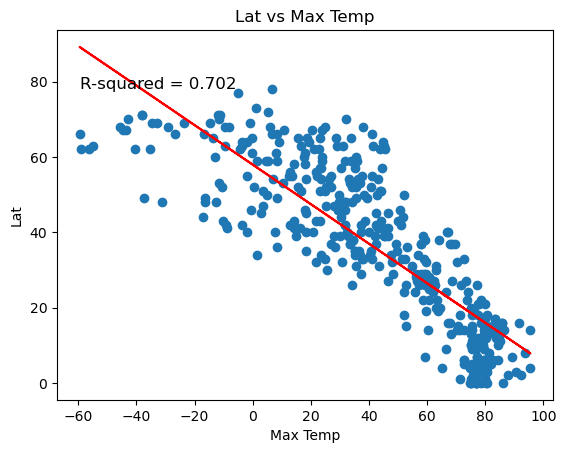

In [56]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Max Temp', 'Lat')

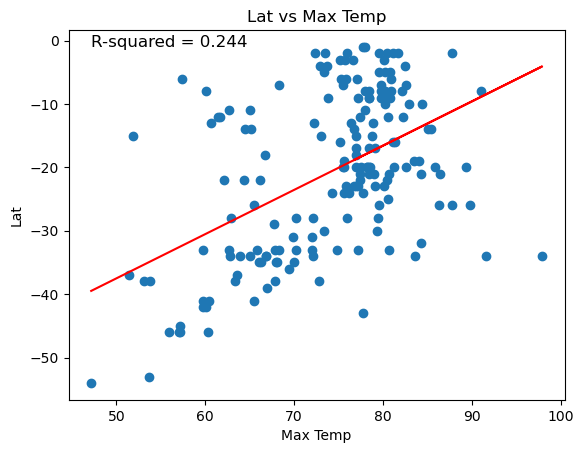

In [57]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Max Temp', 'Lat')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

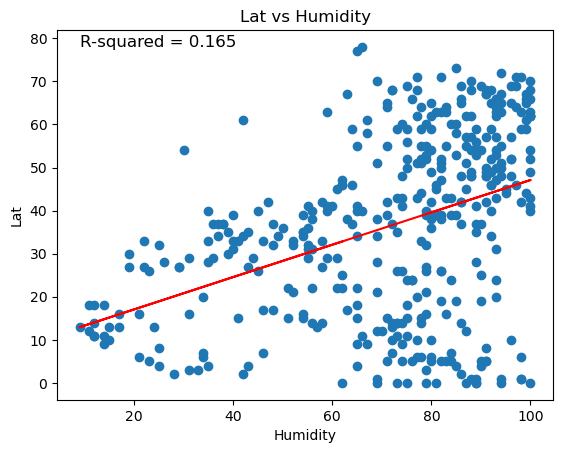

In [58]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Humidity', 'Lat')

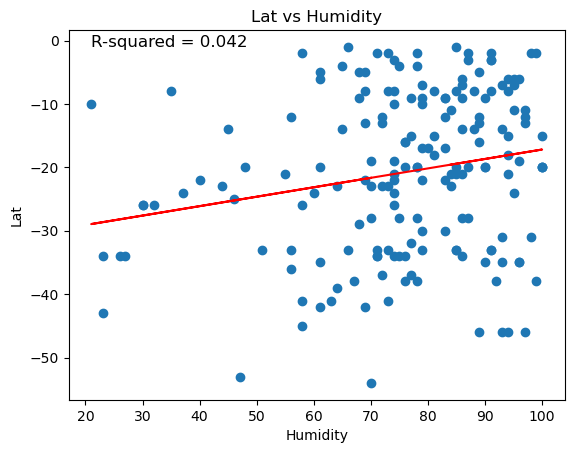

In [59]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Humidity', 'Lat')

**Discussion about the linear relationship:** As seen by the visualizations and provided R-squared values, linear regression is not a very good fit for either hemisphere, though it is closer in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

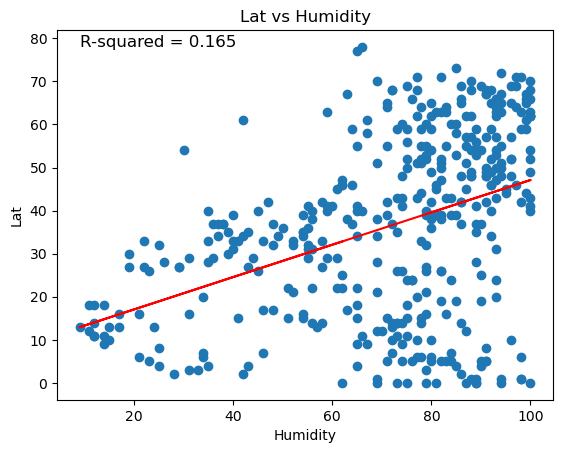

In [60]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Humidity', 'Lat')

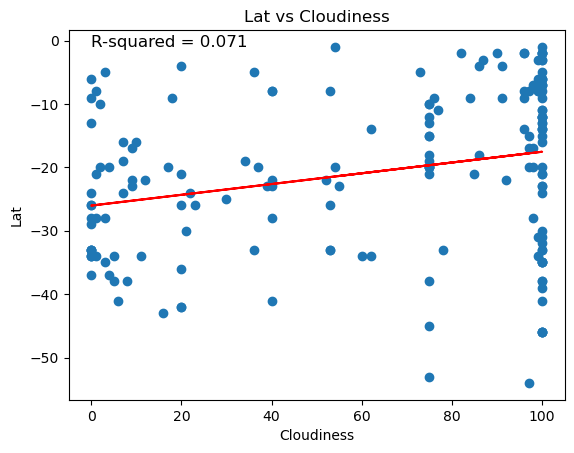

In [61]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Cloudiness', 'Lat')

**Discussion about the linear relationship:** As seen by the visualizations and provided R-squared values, linear regression is not a very good fit for either hemisphere, though it is better in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

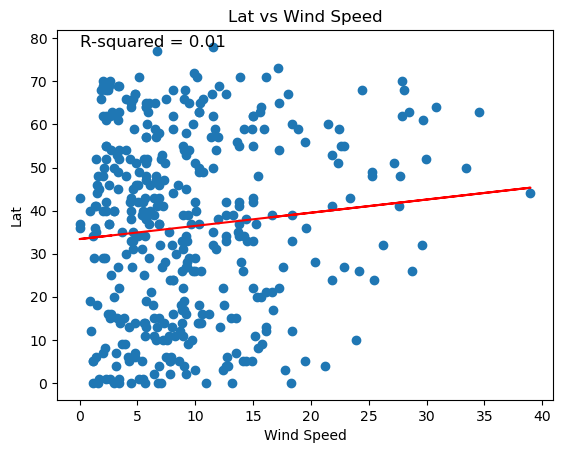

In [62]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Wind Speed', 'Lat')

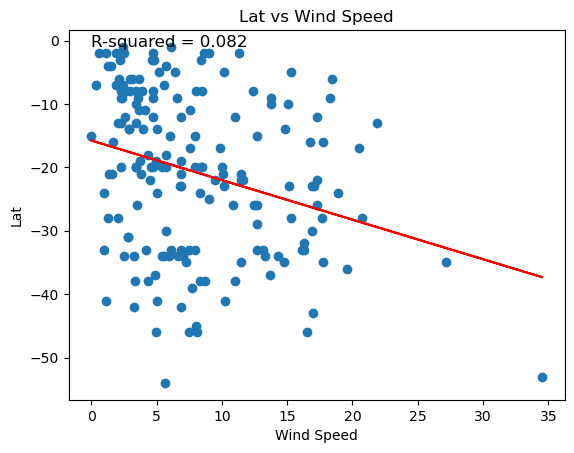

In [63]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Wind Speed',  'Lat')

**Discussion about the linear relationship:** As seen by the visualizations and provided R-squared values, linear regression is not a very good fit for either hemisphere, though it is better in the southern hemisphere.